# Assignment Applied Machine Learning BSc IK 

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: **alleen de hoofdletter** (iets als  `A` of `B` dus)

__Namen__: 

__Emails__: 

__Student ids__ : 

__Groep__ : VervangMijDoorEenHoofdletter

## Toelichting

* Een aantal opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Applied Machine Learning W6

In the exercises of this week we will be looking more closely at different Machine Learning models, such as decision trees and random forests. We will also be taking our first look at building models for the text domain, which will also be part of the assignment for next week.


## Assignment Index

- 1.1 [Decision Trees and Random Forests](#random_forests)
- 1.2 [Logistic Regression with the Titanic dataset](#titanic)
- 1.3 [Text Classification](#text_classification)

In [1]:
import os
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# testing
from numpy.testing import *
from nose.tools import assert_count_equal, assert_equal, assert_almost_equals
from pandas.testing import assert_frame_equal

# Please do not remove this: 
np.random.seed(31415)

<a id="random_forest" />

# Decision trees and random forests

In this for exercise we will be working with decision trees on the familiar digits dataset. We will be using a random forest classifier to classify the images, and do a little exploration on the mistakes that the classifier makes.

* Create a random forest classifier for the digits dataset, with a 80-20 test train split.
* Evaluate with a report of P, R and F1 for each digit (class) and a confusion matrix.
* Not only predict a class, but also compute the probabilities for each class using `predict_proba`.
  - You can use `predict_proba` and make binary labels from it, so you only have to run the 
  prediction code once.
* Make an insightful investigation of this probability space.
    * which ones are more easily confused (eg, the probability of the winner is not that high and not that far off from the numbefr 2.)
    * Write a small report, with insightful tables and graphics.


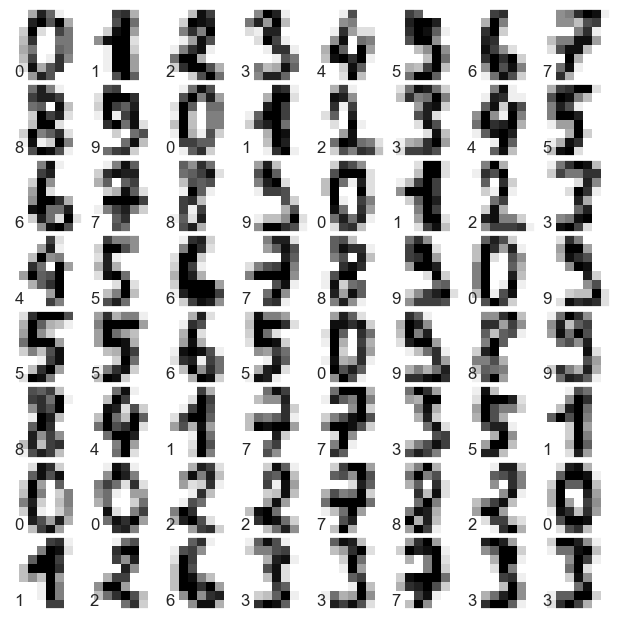

In [2]:
# We give this to you, we load in the dataset and we show a small example of the dataset.
from sklearn.datasets import load_digits
digits = load_digits()

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels to get a feel for what is in the digits dataset.
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [3]:
np.random.seed(31415)# Do not remove this
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Set up the data and split up in train and test
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [4]:
# Next is making the classifier and predicting the labels of the digits
forest = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_prob = forest.predict_proba(X_test)

predicted_probabilities = y_prob
predicted_labels = y_pred
digits_confusion_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
digits_confusion_matrix, predicted_probabilities[:10]

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.96      0.72      0.83        36
           2       0.80      0.94      0.87        35
           3       0.82      0.86      0.84        37
           4       0.81      0.94      0.87        36
           5       0.85      0.76      0.80        37
           6       0.94      0.94      0.94        36
           7       0.87      0.94      0.91        36
           8       1.00      0.69      0.81        35
           9       0.71      0.81      0.75        36

    accuracy                           0.86       360
   macro avg       0.87      0.86      0.86       360
weighted avg       0.87      0.86      0.86       360



(array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 26,  3,  1,  2,  2,  1,  0,  0,  1],
        [ 0,  0, 33,  2,  0,  0,  0,  0,  0,  0],
        [ 1,  0,  1, 32,  0,  1,  0,  1,  0,  1],
        [ 1,  0,  0,  0, 34,  0,  0,  1,  0,  0],
        [ 0,  0,  0,  1,  1, 28,  0,  0,  0,  7],
        [ 0,  0,  0,  0,  2,  0, 34,  0,  0,  0],
        [ 0,  0,  0,  0,  2,  0,  0, 34,  0,  0],
        [ 0,  0,  4,  1,  0,  1,  1,  1, 24,  3],
        [ 0,  1,  0,  2,  1,  1,  0,  2,  0, 29]], dtype=int64),
 array([[0.04846782, 0.10914022, 0.05164841, 0.05592519, 0.1319268 ,
         0.09095852, 0.04730915, 0.3165469 , 0.10869018, 0.03938681],
        [0.05793478, 0.09693081, 0.03678597, 0.02748489, 0.38969027,
         0.04715674, 0.12395582, 0.08509992, 0.09556574, 0.03939506],
        [0.01626789, 0.09724765, 0.09955284, 0.06034442, 0.04664158,
         0.37494517, 0.03600577, 0.1143497 , 0.10365248, 0.05099249],
        [0.00690039, 0.11468991, 0.11511633, 0.06448095, 0.05666771,

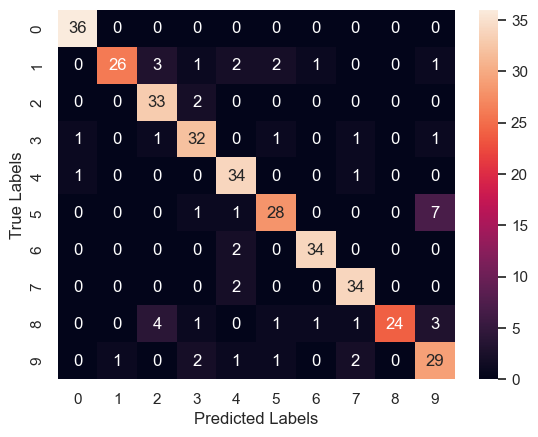

In [5]:
import seaborn as sns
df = pd.DataFrame(digits_confusion_matrix)

sns.heatmap(data=df, annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [6]:
assert_equal(X_train.shape, (1437, 64))
assert_equal(X_test.shape, (360, 64))
assert_equal(y_train.shape, (1437,))
assert_equal(y_test.shape, (360,))
assert_equal(predicted_probabilities.shape, (360, 10))
assert_equal(predicted_labels.shape, (360,))

Below, do a small report on the predicted probabilities, showing easy and hard to classify instances. Also fill in the `most_confused` variable, which should be a list of ten elements, where for each digit you report the digit it was confused by most. 

In [7]:
df_prob = pd.DataFrame(y_prob)
df_prob['class'] = y_pred

arr =  np.full((10, 10), np.nan)

for i in range(10):
    for j in range(10):
        arr[i][j] = df_prob[df_prob['class'] == i].mean()[j]
np.fill_diagonal(arr, 0)

df_confused = pd.DataFrame(arr)

In [8]:
most_confused = [df_confused[i].idxmax() for i in df_confused.index] # Fill this in
# Hint: maybe set the diagonal to zero?

# Also make a nice report on the scores
print(classification_report(y_test, y_pred))

# Show this in a nice dataframe
pd.DataFrame({'Class': range(10), 'Most Confused With': most_confused})

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.96      0.72      0.83        36
           2       0.80      0.94      0.87        35
           3       0.82      0.86      0.84        37
           4       0.81      0.94      0.87        36
           5       0.85      0.76      0.80        37
           6       0.94      0.94      0.94        36
           7       0.87      0.94      0.91        36
           8       1.00      0.69      0.81        35
           9       0.71      0.81      0.75        36

    accuracy                           0.86       360
   macro avg       0.87      0.86      0.86       360
weighted avg       0.87      0.86      0.86       360



,Class,Most Confused With
0,0,9
1,1,8
2,2,3
3,3,9
4,4,7
5,5,9
6,6,4
7,7,4
8,8,1
9,9,3


Write a small report about the predictions of the classifier using `predict_proba`, and discuss the probability space of each true digit class. For instance, argue, using the probabilities which digit class is the easiest to predict correctly, and which one is the hardest. What properties of the probability space make you think it is easy or hard? Don't write a lot, make good pictures. Make the code in the empty cell below.

In [9]:
#WRITE YOUR CODE HERE

<a id="titanic" />

# Logistic Regression for the Titanic Dataset

In exercise we are going to use logistic regression on the Titanic dataset, similar to what we did last week with linear regression. We are mostly going to perform the same steps as last week, performing a grid search on parameters, and comparing the performance of different models. We are also going to do a bit more in-depth preprocessing, working with categorical variables.

## P1 standardization & Categorical Variables

* Load the titanic dataset.
* Impute the missing data.
* Split the dataset into a train and test set with an 80/20 split.
* Z-transform all explanatory variables.
* Now use logistic  regression to predict survived from the other variables.
* Output the regression weights, and compute Rsquare and RMSE.

## P2 Grid Search

* Split titanic into train, validation, test.
* Again, scale the data.
* Use the validation set to find optimal values for the the relevant parameters.
* Tabulate or plot the outcomes in a handy and insightful manner, "displaying the grid of possibilities".
* Pick the best model from the validation set, and run this on the the test set.

## P3 More Models

* Train two other models, SVM and  random forest, as described in the Data Science Handbook notebooks.
* Report the scores of the three models in a meaningful way, and conclude.
* Are you able to make confidence intervals? Can you say something about significant differences?
* Can you indicate where improvements are made, if any?

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
# We will load the dataset for you
titanic = sns.load_dataset('titanic')
# Drop the alive column, this is just another version of the survived column.
titanic.drop(['alive', 'pclass', 'embarked', 'who', 'alone', 'adult_male', 'sibsp', 'sex'], axis=1, inplace=True)
# For this exercise we are going to work on a subset of the columns

In [31]:
titanic.head()

,survived,age,parch,fare,class,deck,embark_town
0,0,22.0,0,7.2500,Third,NaN,Southampton
1,1,38.0,0,71.2833,First,C,Cherbourg
2,1,26.0,0,7.9250,Third,NaN,Southampton
3,1,35.0,0,53.1000,First,C,Southampton
4,0,35.0,0,8.0500,Third,NaN,Southampton


## P1 standardization & Categorical Variables

Here we will prepare the data for classification and run a first classifier, we will perform several steps, including the one-hot encoding of the categorical variables.

* Load the titanic dataset.
* Impute the missing data, use the median for the age column, and the mode for the other two column, think about why we do this.
* Split the dataset into a train and test set, using an 80/20 split.
* Z-transform all explanatory variables.
* Now use logistic  regression to predict survived from the other variables.
* Output the regression weights, and compute Rsquare and RMSE.

In [32]:
print(f"Amount of nan values in age: {titanic['age'].isna().sum()}")
print(f"Amount of nan values in deck: {titanic['deck'].isna().sum()}")
print(f"Amount of nan values in embark_town: {titanic['embark_town'].isna().sum()}")

Amount of nan values in age: 177
Amount of nan values in deck: 688
Amount of nan values in embark_town: 2


In [33]:
titanic['age'].mean(), titanic['deck'].mode()[0], titanic['embark_town'].mode()[0]

(29.69911764705882, 'C', 'Southampton')

> We can't take the mean of a string. That's why we use the mode ```ValueError: could not convert string to float:```

In [34]:
from sklearn.preprocessing import StandardScaler
np.random.seed(31415)# Do not remove this
# Do the imputation of the relevant columns below
titanic['age'] = titanic['age'].fillna(round(titanic['age'].mean(), 0)) # impute with median
titanic['deck'] = titanic['deck'].fillna(titanic['deck'].mode()[0]) # impute with mode
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0]) # impute with mode

titanic

,survived,age,parch,fare,class,deck,embark_town
0,0,22.0,0,7.2500,Third,C,Southampton
1,1,38.0,0,71.2833,First,C,Cherbourg
2,1,26.0,0,7.9250,Third,C,Southampton
3,1,35.0,0,53.1000,First,C,Southampton
4,0,35.0,0,8.0500,Third,C,Southampton
...,...,...,...,...,...,...,...
886,0,27.0,0,13.0000,Second,C,Southampton
887,1,19.0,0,30.0000,First,B,Southampton
888,0,30.0,2,23.4500,Third,C,Southampton
889,1,26.0,0,30.0000,First,C,Cherbourg


In [35]:
print(f"Amount of nan values in age: {titanic['age'].isna().sum()}")
print(f"Amount of nan values in deck: {titanic['deck'].isna().sum()}")
print(f"Amount of nan values in embark_town: {titanic['embark_town'].isna().sum()}")

Amount of nan values in age: 0
Amount of nan values in deck: 0
Amount of nan values in embark_town: 0


## Categorcial Features

The titanic dataset contains several categorical features, and we want to use them for our logistic regression. We already touched on this earlier, and mentioned that you can do this using one hot encodings. Fortunately, scikit learn offers easy functions to do this. We will be using a nice sklearn function to do our preprocessing, but also take a look at the code in the cell below and in particular the shapes, and see if you understand why our categorical features would have that shape now.

Please fill in the code below where you create one hot encodings for the categorical features, and fill in the `categorical_features` list.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = [] # Fill in the colum names of the categorical features
#WRITE YOUR CODE HERE

encoder = OneHotEncoder(sparse_output=False)
categorical_feature_matrix = []
for feature in categorical_features:
    one_hot_encoded_feature = encoder.fit_transform(titanic[feature].to_numpy().reshape(-1, 1))
    # Understand the new shape of the feature?
    print(one_hot_encoded_feature.shape)
    # now add it to the dataset and drop the original feature
    categorical_feature_matrix.append(one_hot_encoded_feature)

Next up we will divide the data up into train and test, and scale the data using the familiar `StandardScaler`. Remember, we don't want to do this on the categorical features. The easiest way to do this is to get the indices of train and test from `train_test_split`, so that you can select the right indices from both the continous and categorical arrays. Of course you don't have to do anything with the `survived` column, as this will be our target.

In [ ]:
# look at this function, it works like a Pipeline object, and is super helpful in 
# our case, where we wanto to apply different transformations to different columns
# There is also a really nice example in the documentation! We also want to use the StandardScalar and OneHotEncoder
# (although a bit unclear, you can give a list with multiple features for each of the transformers)
from sklearn.compose import make_column_transformer

continuous_features = [] # fill in the categorical features
X_train, X_test, y_train, y_test = None, None, None, None

scaler_and_oneh_encoder = None # fill this in, using the right transformer for the right columns with the lists you already made


#WRITE YOUR CODE HERE
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train_scaled_and_encoded = None
X_test_scaled_and_encoded = None
#Now we Z transform the variables
#WRITE YOUR CODE HERE
X_train_scaled_and_encoded.shape, X_test_scaled_and_encoded.shape

In [ ]:
assert_equal(titanic['age'].isna().sum(), 0)
# are the sizes of the train and test sets correct?
assert_equal(X_train_scaled_and_encoded.shape, (712, 16))
assert_equal(X_test_scaled_and_encoded.shape, (179, 16))

Now that we have processed the data, we will run the logistic classification model, complete the code in the cell below.

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = None
predictions = None
regression_weights = None
r2 = None
rsme = None
#WRITE YOUR CODE HERE
r2, rmse

In [ ]:
assert_equal(predictions.shape[0], 179)

## P2 Grid Search

Here, do a grid search over the parameters of the Logistic Regression model, we have already given the ranges
for the variables that we want you to try, for this, split the data into train, and test, and use this training with the gridsearch function with the cross validation set to 5. Use the data you created in the previous exercise.

HINT: sklearn does not have a function to directly split a dataset into train, validation and test, but you can use `train_test_split` twice, once to create separate train and test sets, and then once more to split the train set into a train and validation portion. Do a 60/20/20 split.

Fill in the `best_params` variable, which should be a dict that contains for each parameter the best option that you found. You might get some warnings about convergence, but you can leave these as is.

In [ ]:
np.random.seed(31415)# Do not remove this

# Define parameter grid for grid search
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.00001, 0.01, 0.1, 1, 10],
              'solver': ['liblinear', 'saga']}

# Perform grid search with cross-validation on the validation set
# to get the best model
best_params = dict() # replace with your answer
logreg = LogisticRegression(random_state=42)
#WRITE YOUR CODE HERE
print(best_params)
# Run the best model on the test set
best_model_predictions = None
#WRITE YOUR CODE HERE

In [ ]:
assert_equal(type(best_params), dict)
assert_equal(best_model_predictions.shape[0], 179)

In [ ]:
#WRITE YOUR CODE HERE

## P3 More Models

* Train two other models, SVM and  random forest, as described in the Data Science Handbook notebooks.
* Report the scores of the three models using `weighted average` for P, R and F1, and conclude.
* Can you indicate where improvements are made, if any?
* Give a report with a dataframe containing P, R and F1 scores per class for each model, and a dataframe with the confidence intervals of the models. See on example below of how it should look like. You can use the train test splits that you created in part 1 for this exercise.

|                     |   precision |   recall |   f1-score |
|:--------------------|------------:|---------:|-----------:|
| Logistic Regression |        -    |     -    |       -    |
| SVM                 |        -    |     -    |       -    |
| Random Forest       |        -    |     -    |       -    |

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Evaluate models on the test set
svm_predictions = None
random_forest_predictions = None
logreg_predictions = None

#WRITE YOUR CODE HERE

In [ ]:
assert_equal(svm_predictions.shape[0], 179)
assert_equal(random_forest_predictions.shape[0], 179)
assert_equal(logreg_predictions.shape[0], 179)


YOUR ANSWER HERE

<a id="text_classification" />

# Text classification

We will now look at a famous set of texts, 20 newsgroups, which even comes with scikit learn. It contains a collection of documents/messages from 20 different Newsgroups, which are basically forums where people are discussing certain topics or asking questions. Each of the documents is labelled with the newsgroup it belongs to and the task is to determine the label of the document based on the contents of the document.

1. Take a look at the code in [this blogpost](https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a).
    * The post does a number of things, and tries out two classifiers, Naive Bayes en SVM, only reports accuracy, and does a tiny bit of preprocessing. 
    * Surely you can do better! ;-)
    
We will expand on the notebook by making several changes/updates, all of which are described below, which we will do one by one. We have given you the original code from the notebook as a starting point, and we will add to it in the questions.

Because of the size of the dataset, we will use a subsample of the data to make it a bit easier for you to work with.

### 1 More elaborate evaluation

You want to see the P, R and F1 for every class, and also the confusion matrix. Make it, and explain the findings. Which newsgroups are easy, which ones tend to get confused? Do not write down in words what is immediately visible in the plots and tables, but guide the reader and give insight.

### 2 More learning algorithms

Our all time favorite, logisctic regression of course, plus another of your choice. Compare the four you have now, and discuss. Do not just compare on accuracy. 

Do not just run a default and that's it. Optimize the relevant hyperparameters using a grid search.

### 3 Feature engineering


Do `CountVectorizer?`. OMG what a lot of possibilities! Make a much simpler, language independent representation by counting not words, but *character ngrams*. Do 2,3, and 4 grams. You may also play with the `max_df` and `min_df`. Play around a bit, and notice the difference in the number of dimensions.

### 4 Baseline

What should you consider an reasonable baseline for multiclass text classification? What algorithm and what representation of the text? Motivate your answer.

### 5 Reduce dimensions

Use PCA to bring all dimensions down to two, plot the documents in this new space and color them by their class, and report. Do you see the easy and hard to separate classes back here?

### Extra 
If you are interested, use the parsimonious language models programmed in `https://github.com/larsmans/weighwords` to create a small language model for each class. Print the top 10-20 terms for each class. Do they make sense? Can you use these highly separating terms only for a classifier? Think of a simple implementation, and try it out.
    

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# This will download the data, this can take a while.
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

# Let's take a look at the labels of the dataset
print(twenty_train.target_names)
print()
#print the first document in the dataset
print(twenty_train.data[0])

Below we have given you the original code from the blogpost where the SVM and SGD classifiers are implemented. Make sure you carefully read the blogpost, and that you really know what is going on here, this will help in the rest of the exercises. Note that with the parameters the way they are, the `SGDClassifier` acts as an SVM model.

In [ ]:

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

text_clf_mnb = Pipeline([('vect', CountVectorizer(max_df=0.95, min_df=0.05)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

text_clf_svm = Pipeline([('vect', CountVectorizer(max_df=0.95, min_df=0.05)),
                     ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter_no_change=5, random_state=42)),
])

# Get the bayes predictions
text_clf_mnb.fit(twenty_train.data, twenty_train.target)
predicted_mnb = text_clf_mnb.predict(twenty_test.data)

# Get the SVM predictions
text_clf_svm.fit(twenty_train.data, twenty_train.target)
predicted_svm = text_clf_svm.predict(twenty_test.data)

print(predicted_mnb.shape, predicted_svm.shape)

### 1 More elaborate evaluation

You want to see the P, R and F1 for every class, and also the confusion matrix. Make it, and explain the findings. Which newsgroups are easy, which ones tend to get confused? Do not write down in words what is immediately visible in the plots and tables, but guide the reader and give insight. Does it make sense that some of these categories might get confused?

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

mnb_confusion_matrix = None
svm_confusion_matrix = None

#WRITE YOUR CODE HERE

#plot MultinomialNB
mnb_matrix = ConfusionMatrixDisplay(confusion_matrix=mnb_confusion_matrix,
                              display_labels=text_clf_mnb.classes_)
mnb_matrix.colorbar = False
# Plot SVM
svm_matrix = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix,
                              display_labels=text_clf_svm.classes_)

# Create a larger figure and axis
fig, axes = plt.subplots(figsize=(16, 16), nrows=1, ncols=2)  # You can adjust the numbers to your desired size

# Plot the confusion matrix on the larger axis
mnb_matrix.plot(ax=axes[0], colorbar=False)
svm_matrix.plot(ax=axes[1], colorbar=False)

axes[0].set_title("Confusion Matrix for Multinomial Bayes Model")
axes[1].set_title("Confusion Matrix for Support Vector Machine Model")

# Set some nicer colorbars than the default
cax_1 = fig.add_axes([axes[0].get_position().x1+0.01,axes[0].get_position().y0,0.02,axes[0].get_position().height])
plt.colorbar(mnb_matrix.im_,  cax=cax_1)

cax_2 = fig.add_axes([axes[1].get_position().x1+0.01,axes[1].get_position().y0,0.02,axes[1].get_position().height])
plt.colorbar(svm_matrix.im_,  cax=cax_2)
# Show the plot
plt.show()


Write the text of your small report in the cell below.

In [ ]:
#WRITE YOUR CODE HERE

### 2 More learning algorithms

Our all time favorite, logisctic regression of course, plus another of your choice. Compare the four you have now, and discuss. Do not just compare on accuracy, report using for example P, R and F1. Also see how the author of the blogpost used a the `Pipeline` method. This is very elegant, so feel free to use it to implement your models here as well.

Do not just run a default and that's it. Optimize the relevant hyperparameters using a grid search and report the scores of the best versions of both models that you found.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

text_clf_logreg = Pipeline([('vect', CountVectorizer(max_df=0.95, min_df=0.05)),
                            ('tfidf', TfidfTransformer()),
                            ('clf', LogisticRegression(solver='sag')),
                           ])

predicted_logreg = None
predicted_model_four = None

#WRITE YOUR CODE HERE

### 3 Feature engineering

Do `CountVectorizer?`.There are  a lot of possibilities! Make a much simpler, language independent representation by counting not words, but *character ngrams*. Do 2,3, and 4 grams. You may also play with the `max_df` and `min_df`. Play around a bit, and notice the difference in the number of dimensions. 

Try with 2,3 and 4 grams,(so for each of these ONLY consider that ngram size and not the smaller ngrams) and fill in the code below, where you report the vocabulary size in the resulting training data for each ngram size, and put this value in `vocab_sizes`. Also, use `char` to get the character ngrams, and not `char_wb`!

Think about what is happening, does the number of features increase or decrease, and why? 

In [ ]:
vocab_sizes = {2: 0, 3: 0, 4: 0} # replace with your answer
#WRITE YOUR CODE HERE
print(vocab_sizes)

### 4 Baseline

In the markdown cell below briefly discuss what an appropriate baseline for a text classification such as the one we are tackling in the NewsGroups20 dataset would be, and how you would represent text.

In [ ]:
#WRITE YOUR CODE HERE

### 5 Reduce dimensions

Use PCA to bring all dimensions down to two, plot the documents in this new space and color them by their class, and report. Do you see the easy and hard to separate classes back here?

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

text_transformer = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=0.05)),
                     ('tfidf', TfidfTransformer())])
                            
# Transform text data with the pipeline
X_train = text_transformer.fit_transform(twenty_train.data)
X_test = text_transformer.transform(twenty_test.data)

X_train_pca = None
X_test_pca = None
                            
#WRITE YOUR CODE HERE

# You should end up with each sample having just two features.
assert_equal(X_train_pca.shape[1], 2)

# Plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=twenty_train.target, cmap='viridis', s=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Projection')
plt.show()

Write the conclusions about the PCA in the markdown cell below.

In [ ]:
#WRITE YOUR CODE HERE

### Extra 
If you are interested, use the parsimonious language models programmed in `https://github.com/larsmans/weighwords` to create a small language model for each class. Print the top 10-20 terms for each class. Do they make sense? Can you use these highly separating terms only for a classifier? Think of a simple implementation, and try it out.
 

In [ ]:
#WRITE YOUR CODE HERE